In [41]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12,10)
pylab.rcParams.update({'font.size': 18})
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0.92, 'Figure 1B: Cancer System Dynamics When a12 = 1')

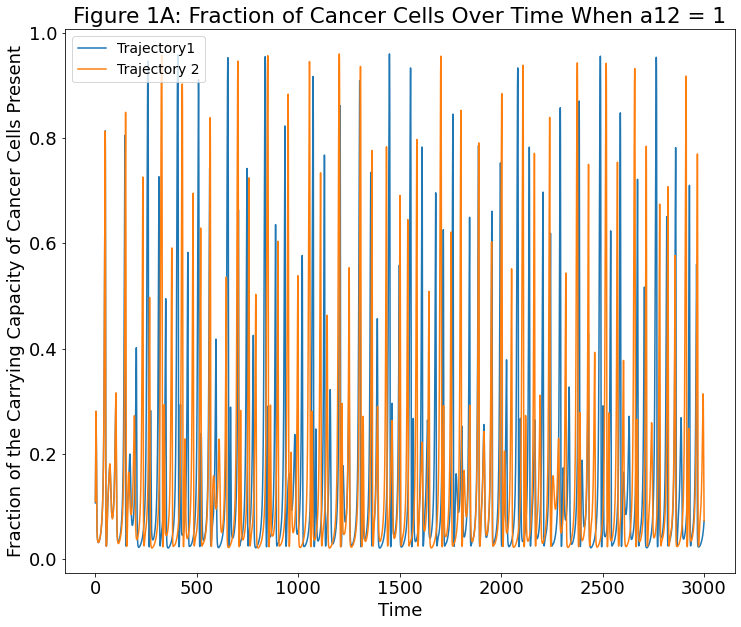

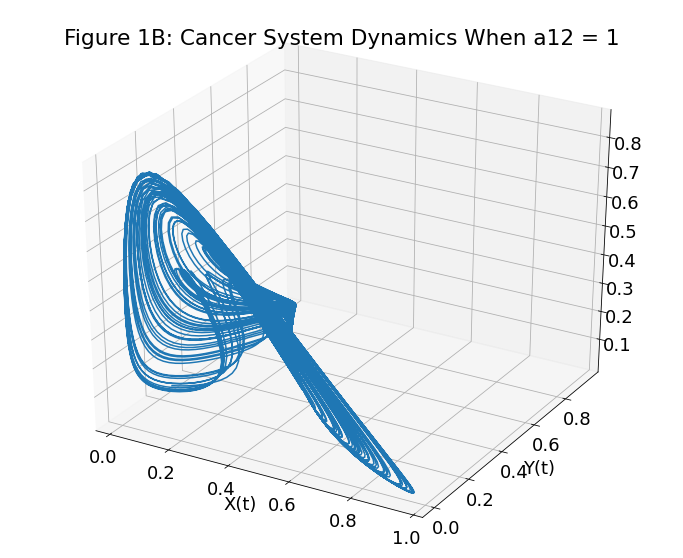

In [42]:
a12 = 1 #Fractional tumor cells killed by healthy cells
a13 = 2.5 #Fractional tumor cells killed by effector cells
r2 = 0.6 #Healthy host cells growth rate
a21 = 1.5 #Fractional healthy cells killed by tumor cells
r3 = 4.5 #Maximum effector cells recruitment rate by tumor cells
k3 = 1 #Steepness coefficient of the effector cells recruitment
a31 = 0.2 #Fractional effector cells inactivated by tumor cells
d3 = 0.5 #Death rate of effector cells

def cancer(state,t):
    
    #Unpacks the state variables
    x = state[0]
    y = state[1]
    z = state[2]
    
    # Rate of change in the fraction of carrying capacity of cancer cells
    dxdt = x*(1-x) - a12*x*y - a13*x*z
    
    # Rate of change in the number of healthy cells
    dydt = r2*y*(1-y) - a21*x*y
    
    # Rate of change in the number of effector cells
    dzdt = (r3*x*z)/(x+k3) - a31*x*z - d3*z
    
    return [dxdt,dydt,dzdt]

# Creates 2 starting conditions that vary slightly
N_trajectories = 2
# 0.1 comes from the given values used in the paper
state0 = .1 + 0.01 * np.random.random((N_trajectories, 3))

#Integrates cancer function over time and plots the trajectories
t = np.linspace(0,3000,10000)
state = np.asarray([odeint(cancer, state0i, t)
                  for state0i in state0])
plt.plot(t, state[0, :, 0])
plt.plot(t, state[1, :, 0])
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cancer Cells Present')
plt.legend(('Trajectory1', 'Trajectory 2'), fontsize = 14)
plt.title('Figure 1A: Fraction of Cancer Cells Over Time When a12 = 1')

# Plots the strange attractor from the first trajetory
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,:,0],state[0,:,1],state[0,:,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 1B: Cancer System Dynamics When a12 = 1')

Text(0.5, 0.92, 'Figure 1D: Cancer System Dynamics When a12 = 0.745')

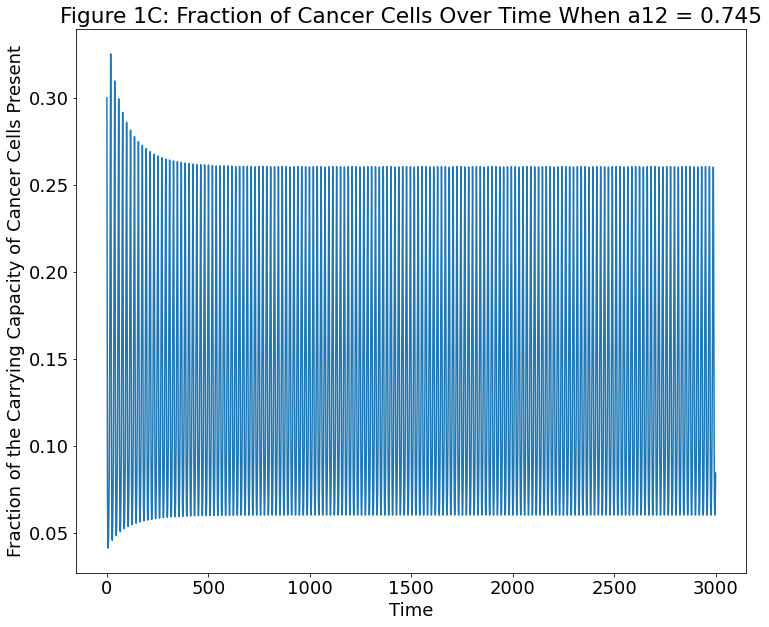

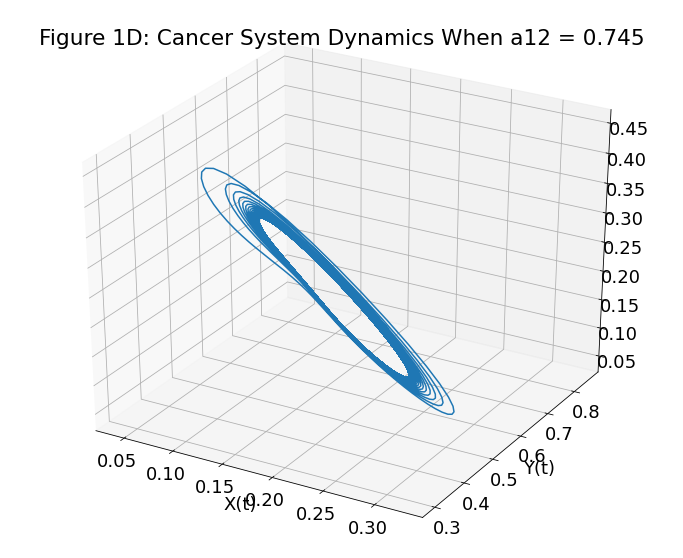

In [43]:
#Changes system dynamics from chaotic to a limit cycle
a12 = 0.745
state0 = [0.3,0.3,0.3]

# Plots limit cycle
state = np.asarray([odeint(cancer, state0, t)])
plt.figure(0)
plt.plot(t, state[0, :, 0])
plt.title('Figure 1C: Fraction of Cancer Cells Over Time When a12 = 0.745')
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cancer Cells Present')

# Graphs cyclical attractor
fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,:,0],state[0,:,1],state[0,:,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 1D: Cancer System Dynamics When a12 = 0.745')

Text(0.5, 0.92, 'Figure 1F: Cancer System Dynamics When a12 > 1')

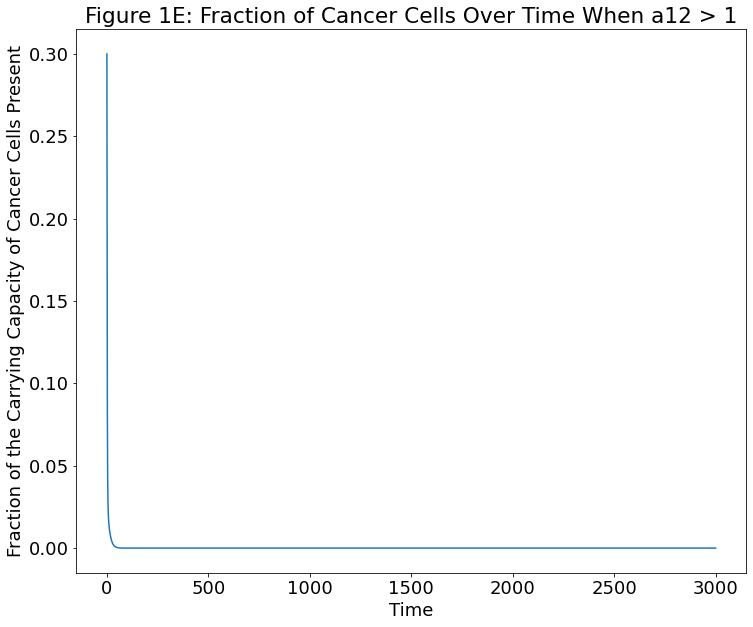

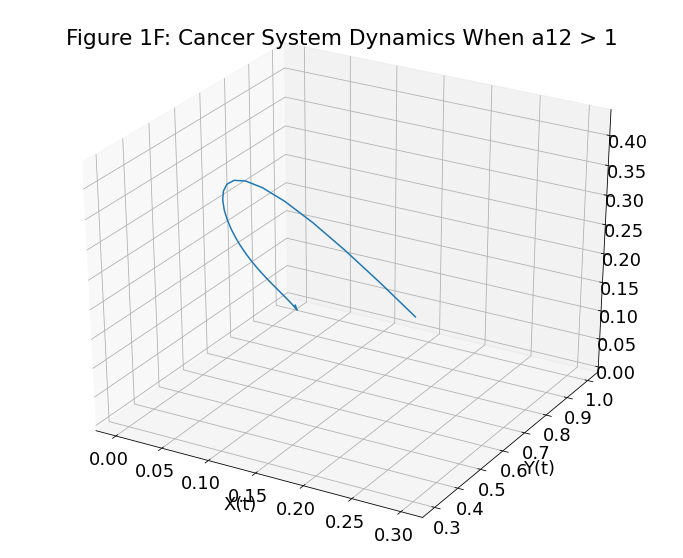

In [44]:
# Changes system dynamics to make it so that it collapses onto a stable equilibrium point
a12 = 1.1
state0 = [0.3,0.3,0.3]

# Plots exponential decay of cancer cells
state = np.asarray([odeint(cancer, state0, t)])
plt.figure(0)
plt.plot(t, state[0, :, 0])
plt.title('Figure 1E: Fraction of Cancer Cells Over Time When a12 > 1')
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cancer Cells Present')

# Plots phase space of the single point attractor
fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,:,0],state[0,:,1],state[0,:,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 1F: Cancer System Dynamics When a12 > 1')



In [30]:
# q represents a sudden increase in the amount of effector cells present such as in immune effector cell therapy
q = 0.01
# New system of ODEs to simulate immune effector cell therapy
def cancer_eff(state,t):
    
    def input(Ton,q): # Makes E = 0 if t is less than Ton and E = q if it is >= Ton
      if t < Ton: # Ton is the time when the increase in effector cells occurs
        E = 0 
      else:
        E = q
      return (E)
    # Unpack the state variables
    x = state[0]
    y = state[1]
    z = state[2]
    
    # New rates of change for cancer, healthy, and effector cells when undergoing immune effector cell therapy
    dxdt = x*(1-x) - a12*x*y - a13*x*z
    dydt = r2*y*(1-y) - a21*x*y
    dzdt = (r3*x*z)/(x+k3) - a31*x*z - d3*z + input(1000,q)
    return [dxdt,dydt,dzdt]


Text(0, 0.5, 'Fraction of the Carrying Capacity of Cells Present')

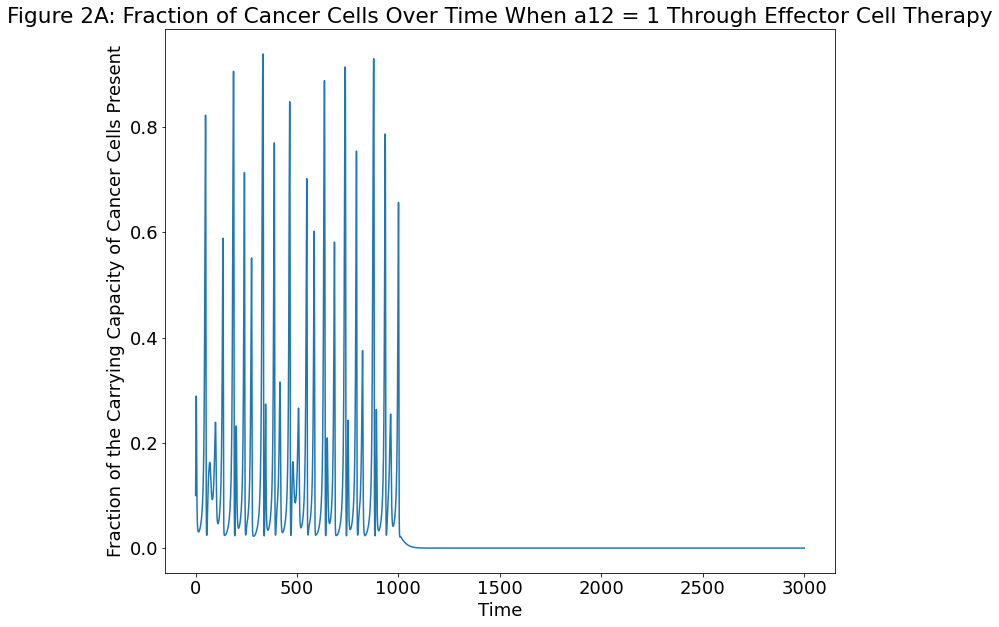

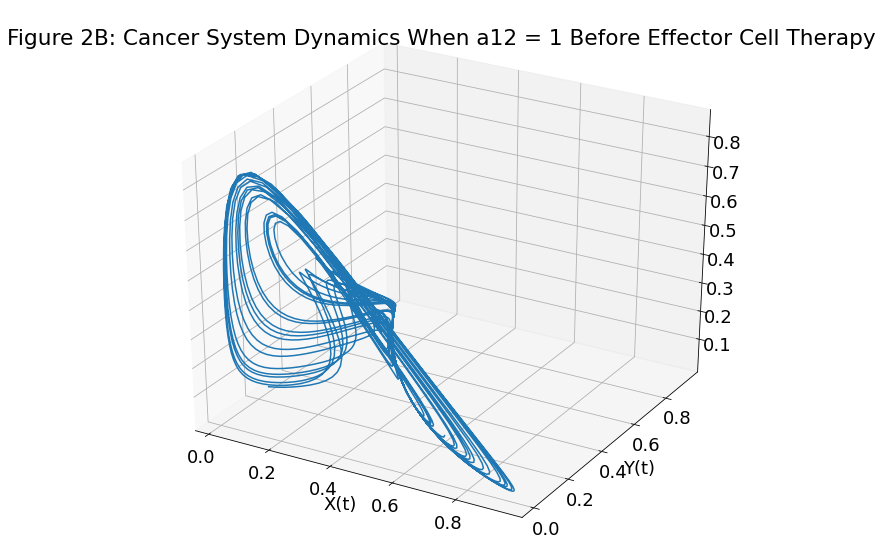

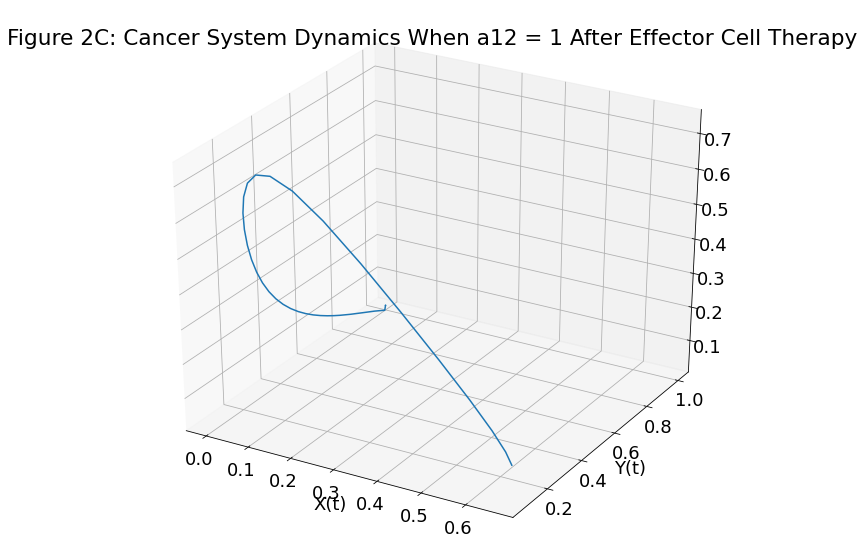

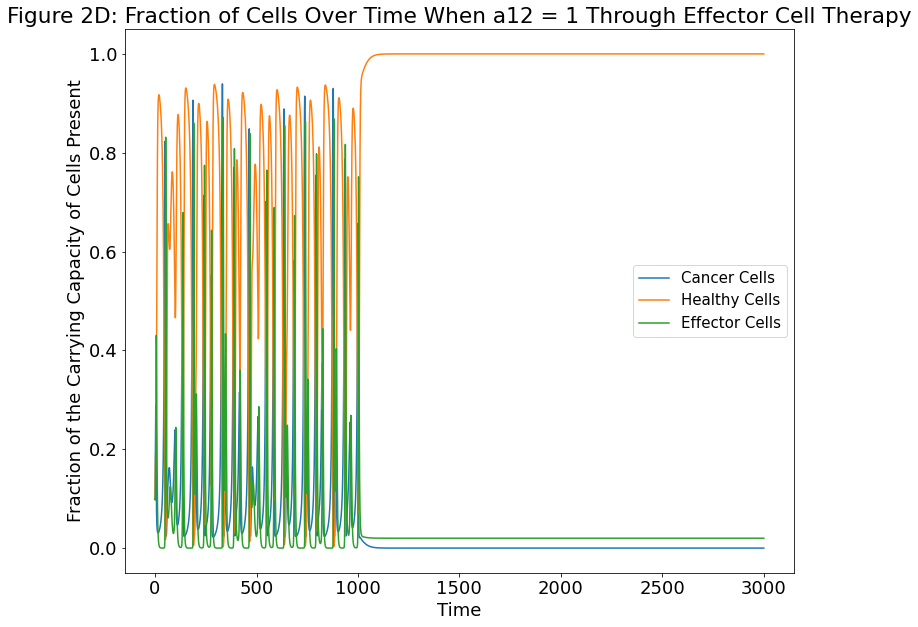

In [50]:
# System parameters that would previously lead to chaotic systerm dynamics, but now instead the chaotic system collapses to a stable equilibrium point at the time of the therapy
a12 = 1.0
state0 = [0.1,0.1,0.1]

# Graphs the number of cancer cells over time before and after the administration of the immune effector cell therapy
state = np.asarray([odeint(cancer_eff, state0, t)])
plt.figure(0)
plt.plot(t, state[0, :, 0])
plt.title('Figure 2A: Fraction of Cancer Cells Over Time When a12 = 1 Through Effector Cell Therapy')
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cancer Cells Present')

# Plots the system attractor before the administration of the immune effector cell therapy
fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,0:3333,0],state[0,0:3333,1],state[0,0:3333,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 2B: Cancer System Dynamics When a12 = 1 Before Effector Cell Therapy')

# Plots the system attractor after the administration of the immune effector cell therapy
fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,3333:,0],state[0,3333:,1],state[0,3333:,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 2C: Cancer System Dynamics When a12 = 1 After Effector Cell Therapy')

# Plots the fractional amount of the carrying capacity for the cancer, healthy, and effector cells over time
plt.figure(4)
plt.plot(t,state[0,:,:])
plt.legend(('Cancer Cells', 'Healthy Cells', 'Effector Cells'), fontsize = 15)
plt.title('Figure 2D: Fraction of Cells Over Time When a12 = 1 Through Effector Cell Therapy')
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cells Present')

Text(0, 0.5, 'Fraction of the Carrying Capacity of Cells Present')

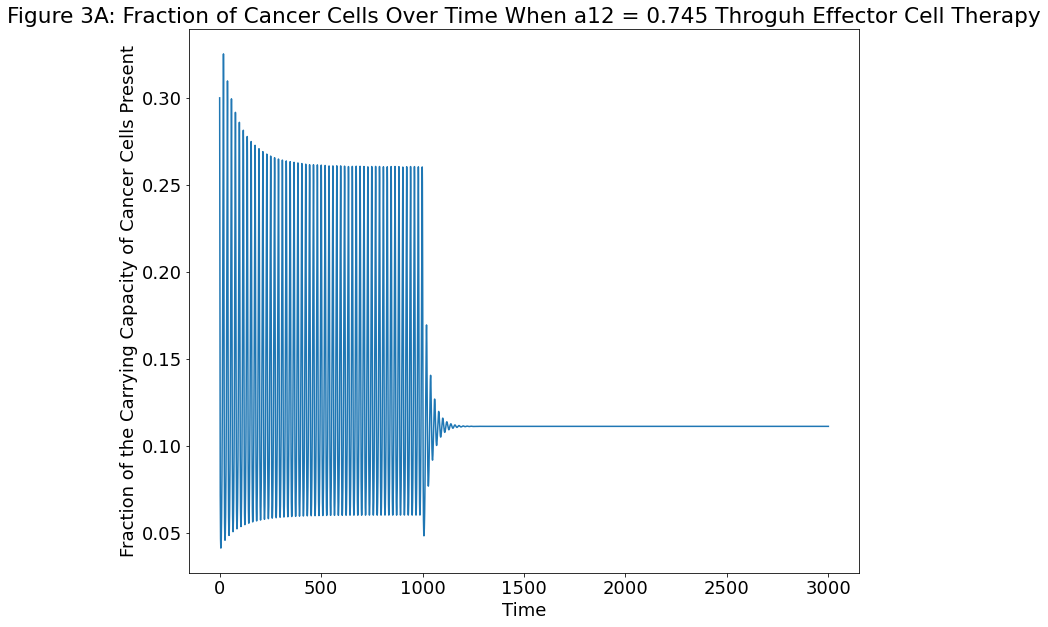

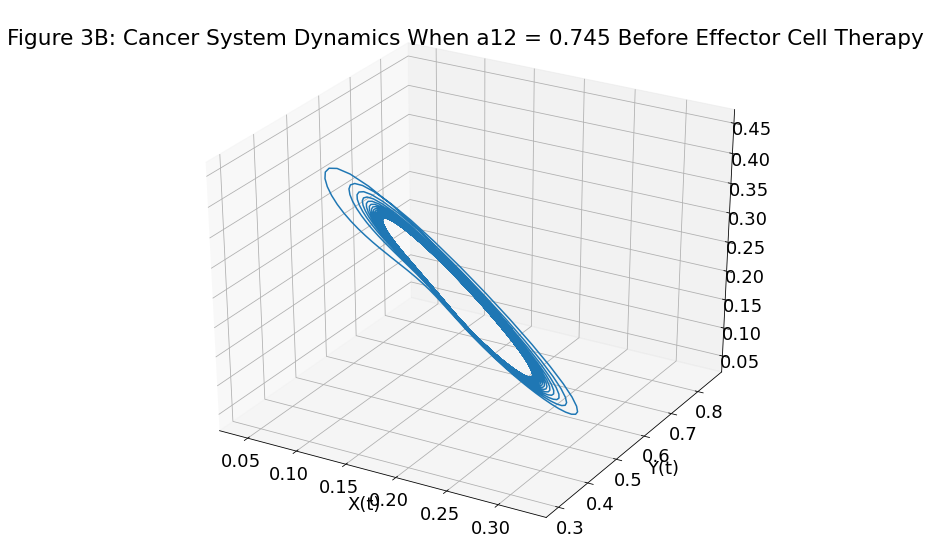

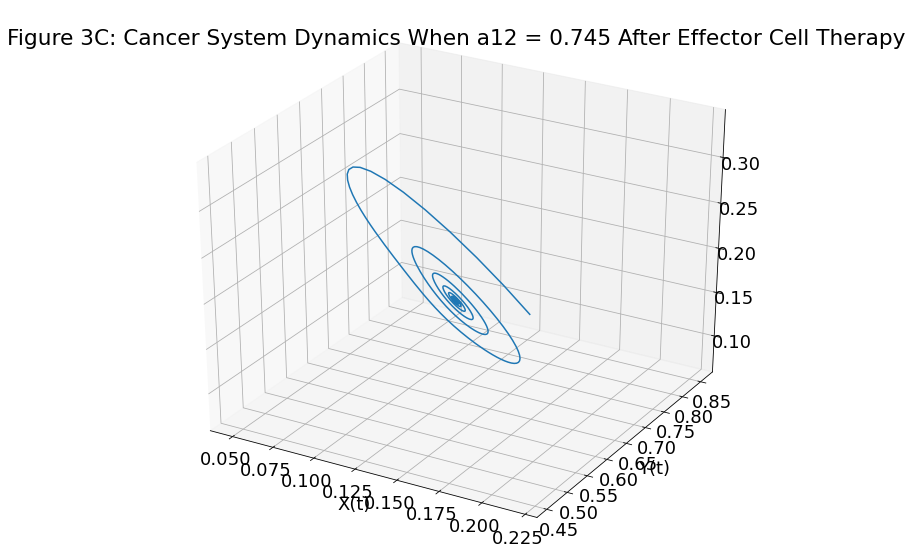

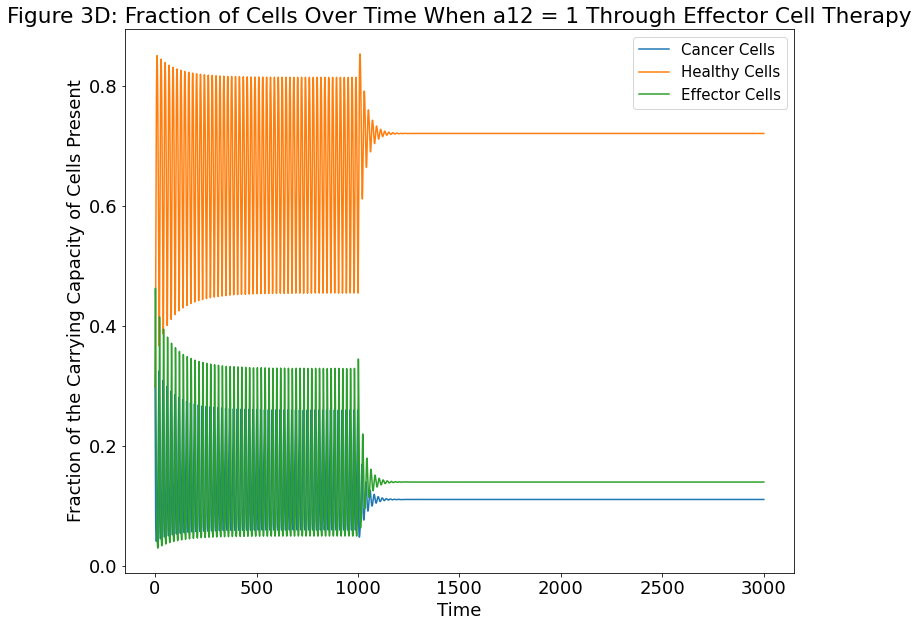

In [51]:
# Similar to the previous cell, this cell performs the same actions but instead using system parameters that would previously yield a limit cycle
a12 = 0.745
state0 = [0.3,0.3,0.3]

state = np.asarray([odeint(cancer_eff, state0, t)])
plt.figure(0)
plt.plot(t, state[0, :, 0])
plt.title('Figure 3A: Fraction of Cancer Cells Over Time When a12 = 0.745 Throguh Effector Cell Therapy')
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cancer Cells Present')

fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,0:3333,0],state[0,0:3333,1],state[0,0:3333,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 3B: Cancer System Dynamics When a12 = 0.745 Before Effector Cell Therapy')

fig = plt.figure()
ax = fig.gca(projection = '3d')
plt.plot(state[0,3333:,0],state[0,3333:,1],state[0,3333:,2])
plt.xlabel('X(t)')
plt.ylabel('Y(t)')
plt.title('Figure 3C: Cancer System Dynamics When a12 = 0.745 After Effector Cell Therapy')

plt.figure(4)
plt.plot(t,state[0,:,:])
plt.legend(('Cancer Cells', 'Healthy Cells', 'Effector Cells'), fontsize = 15)
plt.title('Figure 3D: Fraction of Cells Over Time When a12 = 1 Through Effector Cell Therapy')
plt.xlabel('Time')
plt.ylabel('Fraction of the Carrying Capacity of Cells Present')

In [47]:
# New system of ODes to simulate chemotherapy
def cancer3(state,t):
    # Function that simulates chemotherapy beginning at time Con and ending at time Coff
    def input(Con,Coff,v): # Makes C = 0 if t is less than Con or greater than Coff and C = v if it is >= Con and <= Coff
      if t < Con or t > Coff:
        C = 0
      else:
        C = v # v represents the portion of cancer cells that the chemotherapy kills
      return (C)
    x = state[0]
    y = state[1]
    z = state[2]
    
    # Modified rate of change in the cancer cell population where v of the cancer cell population x is killed by the chemotherapy
    dxdt = x*(1-x) - a12*x*y - a13*x*z - input(500,2000,v)*x
    
    # The chemotherapy will also kill healthy cells but at a much reduced rate; this is represented in the chemotherapy's efficiecny rate with healthy cells, e
    dydt = r2*y*(1-y) - a21*x*y - e[i]*input(500,2000,v)*y
    
    # The rate of change in effector cells remains unchanged
    dzdt = (r3*x*z)/(x+k3) - a31*x*z - d3*z 
    
    return [dxdt,dydt,dzdt]


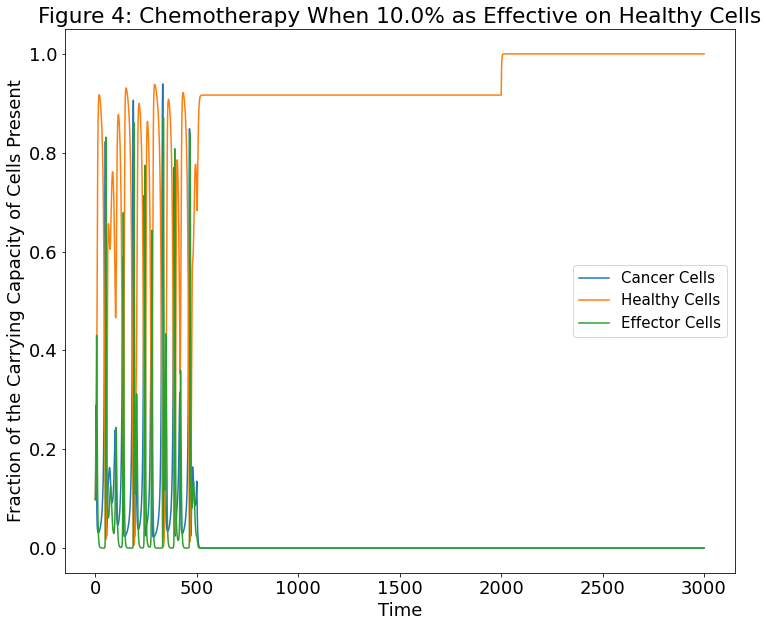

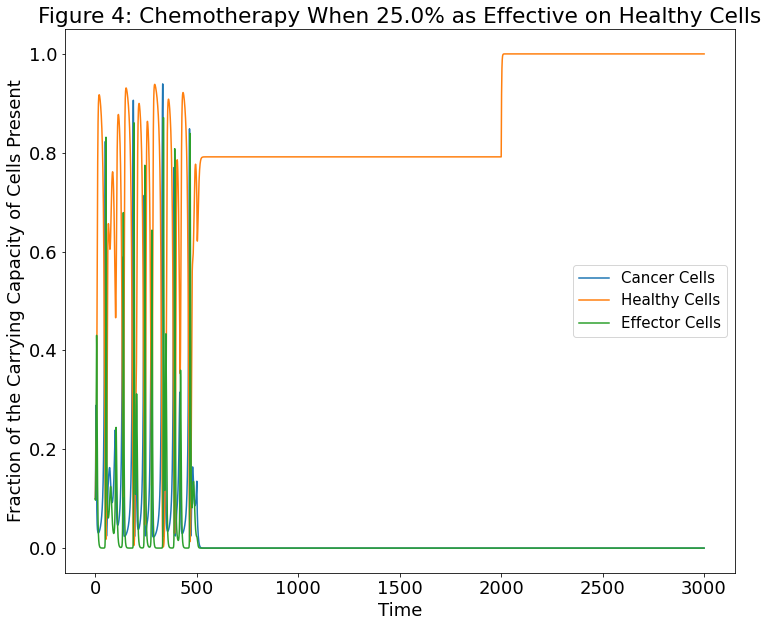

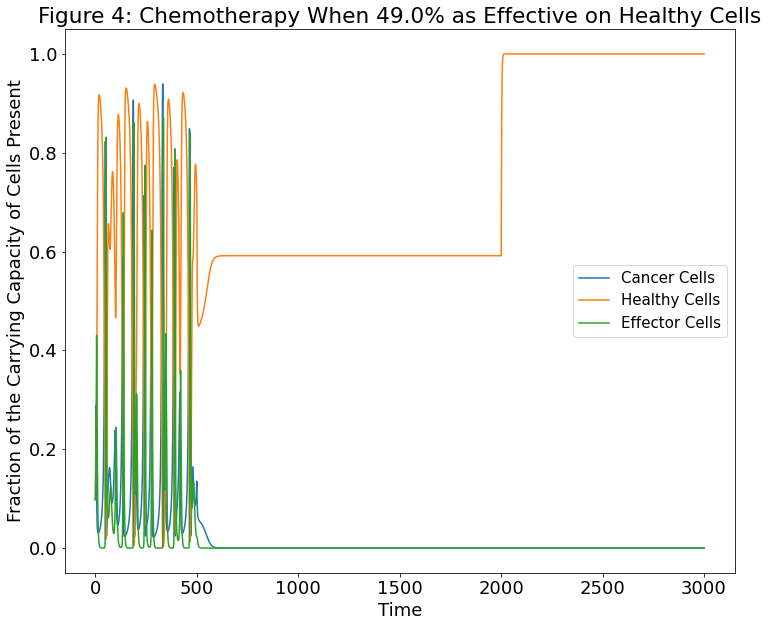

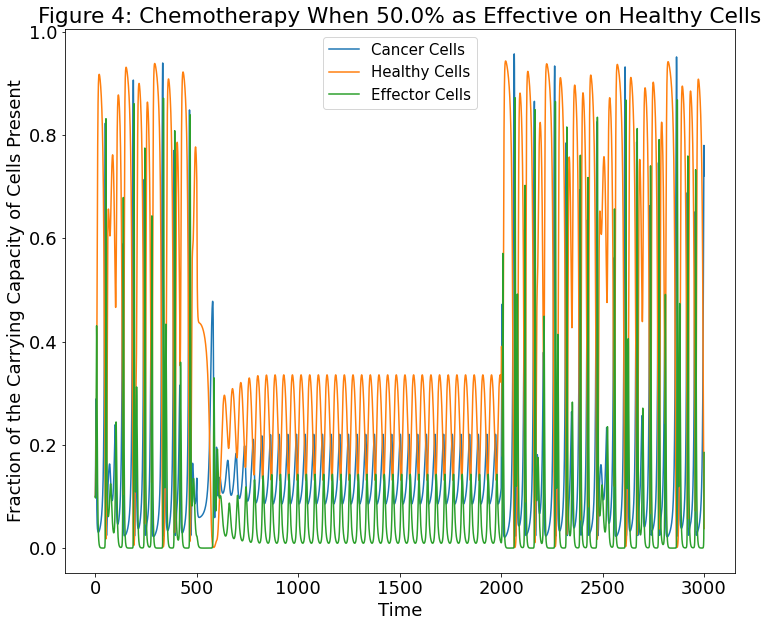

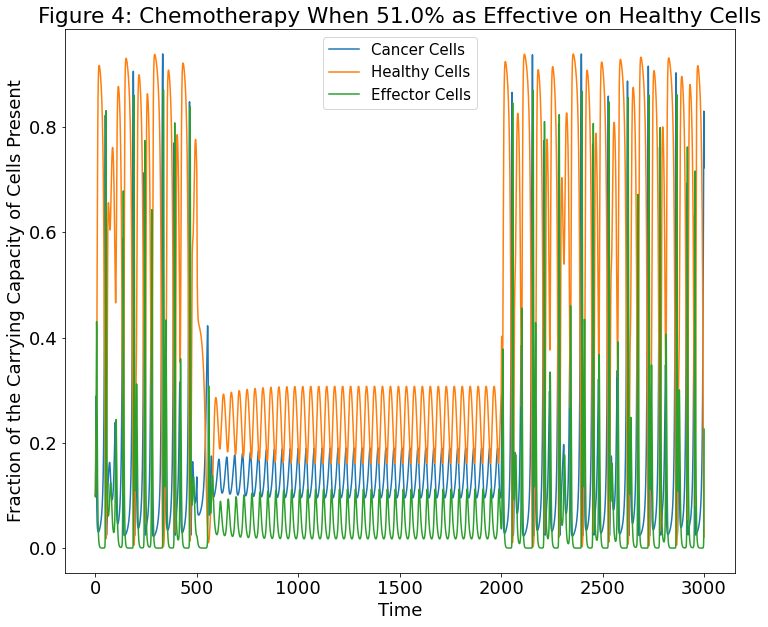

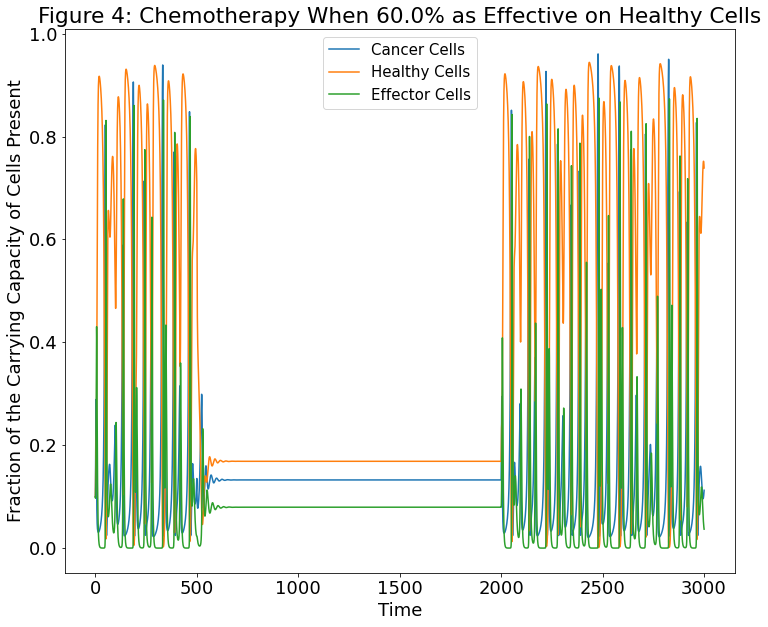

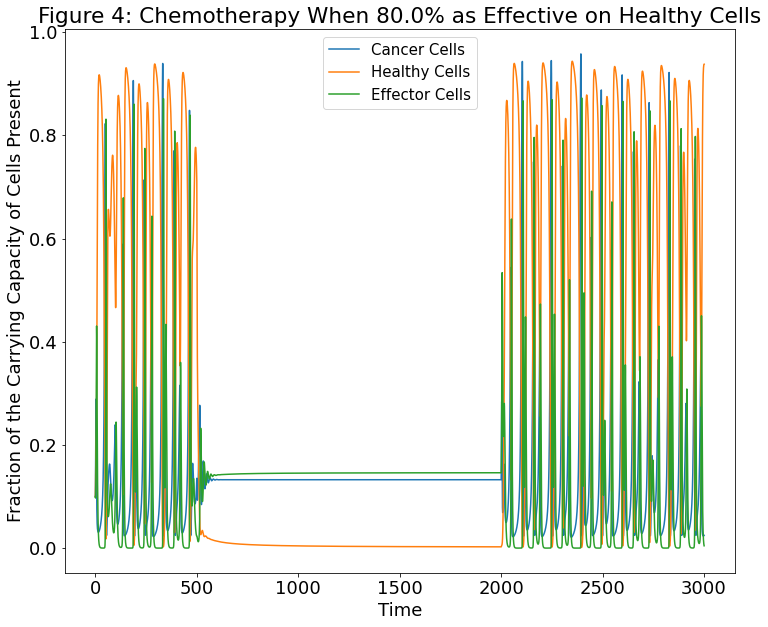

In [48]:
# Starting parameters that would previously yield chaotic behavior
state0 = [0.1,0.1,0.1]
a12 = 1 

# Simulates chemotherapy that kills 50% of the cancer population for various values of the therapy's effect on healthy cells
v = 0.5
e = [0.1,.25,0.49,0.5,0.51,0.6,0.8]
t = np.linspace(0,3000,10000)

# Samples every value of e
for i in range(0,len(e)):
    
    # Integrates the new chemotherapy cancer ODEs
    state = np.asarray([odeint(cancer3, state0, t)])
    
    # Plots the population of each of the cell types over time
    plt.figure(i)
    plt.plot(t,state[0,:,:])
    plt.legend(('Cancer Cells', 'Healthy Cells', 'Effector Cells'), fontsize = 15)
    string = 'Figure 4: Chemotherapy When '+ str(e[i]*100) +'% as Effective on Healthy Cells'
    plt.title(string)
    plt.xlabel('Time')
    plt.ylabel('Fraction of the Carrying Capacity of Cells Present')
